
## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.


## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.


In [6]:
import pandas as pd  # ✅ This imports pandas as pd

df = pd.read_csv('bankmarketing.csv')  # ✅ Now this will work
df.head()  # ✅ Shows first 5 rows




age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

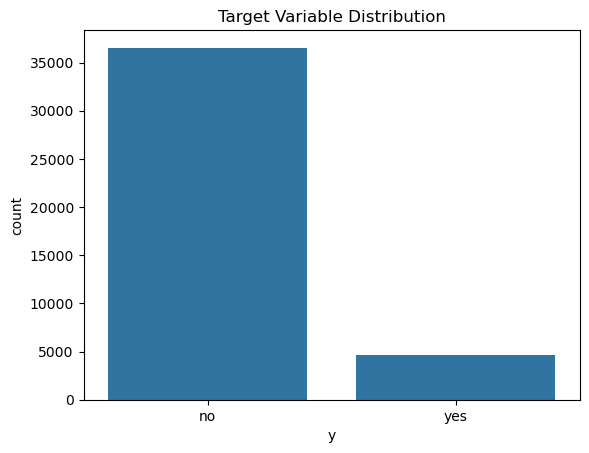

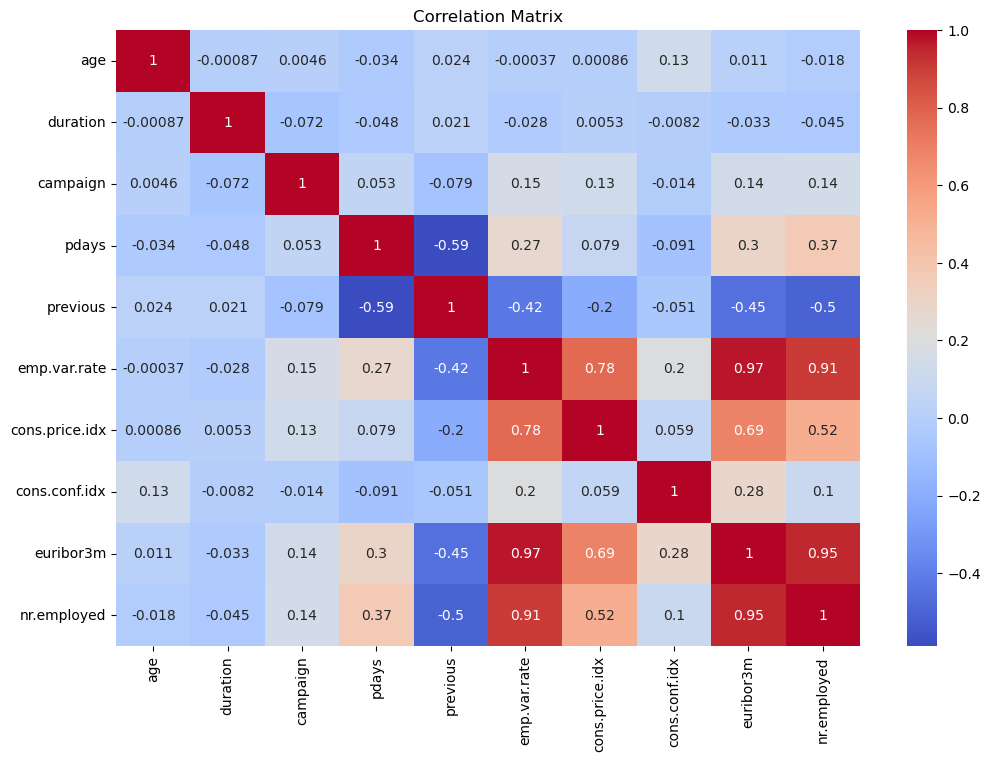

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.countplot(x='y', data=df)
plt.title('Target Variable Distribution')
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [12]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      False      False   
1          -36.4      4.857       5191.0  ...      False      False   
2          -36.4      4.857       5191.0  ...      False      False   
3          -36.4      4.857       5191.0  ...      False      False   
4          -36.4      4.857       5191.0  ...      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False             True            False            False   
1      False             True            False            False   
2      False             True            False            False   
3      False             True            False            False   
4      False             True            False            False   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  y_yes  
0            False                  True             False  False  
1            False                  True             False  False  
2            False                  True             False  False  
3            False                  True             False  False  
4            False                  True             False  False  

[5 rows x 54 columns]

In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y_yes', axis=1)  # Target column after encoding will be 'y_yes'
y = df_encoded['y_yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.preprocessing import StandardScaler

# Create scaler and fit on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression with scaled data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))


Accuracy: 0.9115076474872542
Precision: 0.66996699669967
Recall: 0.43422459893048126
F1 Score: 0.526930564568462


In [31]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))


Decision Tree Results:
Accuracy: 0.8868657441126487
Precision: 0.5015384615384615
Recall: 0.5229946524064171
F1 Score: 0.512041884816754


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9119932022335518
Precision: 0.65
Recall: 0.48663101604278075
F1 Score: 0.5565749235474006


In [35]:
model_scores = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ]
})

print(model_scores)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.911508   0.669967  0.434225  0.526931
1        Decision Tree  0.886866   0.501538  0.522995  0.512042
2        Random Forest  0.911993   0.650000  0.486631  0.556575
